# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
#json.load((open('data/world_bank_projects_less.json')))

In [7]:
# load as Pandas dataframe
#sample_json_df = pd.read_json('data/world_bank_projects_less.json')
#sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

****
## Question 1

Top 10 countries with most projects. Output shows (country name, number of projects)

In [8]:
from collections import Counter

json_df = pd.read_json('data/world_bank_projects.json')

count_projects = []
for country, row in zip(json_df['countryname'],json_df['mjtheme_namecode']):
    for project in row:
        count_projects.append(country)
        
Counter(count_projects).most_common(10)

[('Republic of Indonesia', 56),
 ('Republic of India', 51),
 ('Socialist Republic of Vietnam', 43),
 ("People's Republic of Bangladesh", 41),
 ('Federative Republic of Brazil', 41),
 ("People's Republic of China", 40),
 ('Africa', 39),
 ('Republic of Yemen', 34),
 ('Kingdom of Morocco', 32),
 ('Republic of Mozambique', 31)]

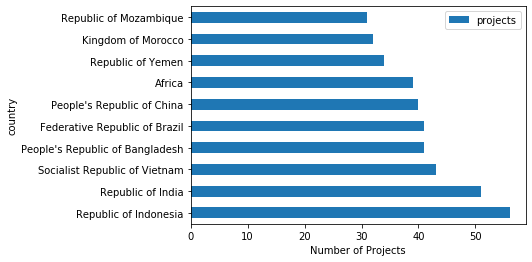

In [18]:
import matplotlib.pyplot as plt

counts = Counter(count_projects).most_common(10)
country = [i[0] for i in counts]
projects = [i[1] for i in counts]
data = dict(list(zip(['country','projects'],[country,projects])))
countries = pd.DataFrame(data).set_index('country')

countries.plot(kind='barh')
plt.xlabel('Number of Projects')
plt.savefig('json_project_top_10_countries.png', bbox_inches="tight")
plt.show()

****
## Question 2

Top 10 major project themes. Output shows (project code, total counts)

In [10]:
codes = []
for row in json_df['mjtheme_namecode']:
    for project in row:
        codes.append(project['code'])

Counter(codes).most_common(10)

[('11', 250),
 ('10', 216),
 ('8', 210),
 ('2', 199),
 ('6', 168),
 ('4', 146),
 ('7', 130),
 ('5', 77),
 ('9', 50),
 ('1', 38)]

****
## Question 3

Creating a code name dictionary and using the dict to fill in missing code names in column 'mjtheme_namecode' of new dataframe 'json_df_clean'

In [11]:
# New dataframe
json_df_clean = pd.read_json('data/world_bank_projects.json')

# Creating a dictionary of codes : names 
code_dict = {}
for row in json_df_clean['mjtheme_namecode']:
    for project in row:
        if project['name']!= '':
            code_dict[project['code']] = project['name']
            
# Using the dictionary to replace missing name values
for row in json_df_clean['mjtheme_namecode']:
    for project in row:
        if project['name']== '':
            project['name'] = code_dict[project['code']]

In [12]:
code_dict # Dictionary of 'code : name' used to fill in missing names

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

Test to ensure all missing code names in column 'mjtheme_namecode' of dataframe 'json_df_clean' were filled in

In [13]:
for row in json_df_clean['mjtheme_namecode']:
    for project in row:
        assert project['name'] != '' # Should produce no output

Test to ensure fill-in accuracy using 'code_dict'

In [14]:
json_df['mjtheme_namecode'][10] # Which should have a missing name

[{'code': '10', 'name': 'Rural development'}, {'code': '2', 'name': ''}]

In [15]:
json_df_clean['mjtheme_namecode'][10] # Which should not have a missing name

[{'code': '10', 'name': 'Rural development'},
 {'code': '2', 'name': 'Public sector governance'}]